In [27]:
import doppy
import os
import glob
import netCDF4 as nc4
import pyart

teamx_halo_path = '/gws/pw/j07/ncas_obs_vol1/amf/raw_data/ncas-lidar-dop-1/incoming/20250603_teamx/Proc/'

datestr = '20250624'
yr = datestr[0:4];
mo = datestr[0:6];

datepath = os.path.join(teamx_halo_path,yr,mo,datestr);
os.chdir(datepath)


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [ ]:
stare_files = [os.path.join(datepath,f) for f in glob.glob(f'Stare_18_{datestr}_*.hpl')];
background_files = [os.path.join(datepath,f) for f in glob.glob(f'Background_*.txt')];
print(stare_files);
print(background_files);

['/gws/pw/j07/ncas_obs_vol1/amf/raw_data/ncas-lidar-dop-1/incoming/20250603_teamx/Proc/2025/202506/20250624/Stare_18_20250624_07.hpl', '/gws/pw/j07/ncas_obs_vol1/amf/raw_data/ncas-lidar-dop-1/incoming/20250603_teamx/Proc/2025/202506/20250624/Stare_18_20250624_09.hpl', '/gws/pw/j07/ncas_obs_vol1/amf/raw_data/ncas-lidar-dop-1/incoming/20250603_teamx/Proc/2025/202506/20250624/Stare_18_20250624_06.hpl', '/gws/pw/j07/ncas_obs_vol1/amf/raw_data/ncas-lidar-dop-1/incoming/20250603_teamx/Proc/2025/202506/20250624/Stare_18_20250624_10.hpl', '/gws/pw/j07/ncas_obs_vol1/amf/raw_data/ncas-lidar-dop-1/incoming/20250603_teamx/Proc/2025/202506/20250624/Stare_18_20250624_23.hpl', '/gws/pw/j07/ncas_obs_vol1/amf/raw_data/ncas-lidar-dop-1/incoming/20250603_teamx/Proc/2025/202506/20250624/Stare_18_20250624_16.hpl', '/gws/pw/j07/ncas_obs_vol1/amf/raw_data/ncas-lidar-dop-1/incoming/20250603_teamx/Proc/2025/202506/20250624/Stare_18_20250624_14.hpl', '/gws/pw/j07/ncas_obs_vol1/amf/raw_data/ncas-lidar-dop-1/inco

In [ ]:
stare = doppy.product.Stare.from_halo_data(
    data=stare_files,
    data_bg=background_files,
    bg_correction_method=doppy.options.BgCorrectionMethod.FIT,
)

In [21]:
stare.write_to_netcdf('/home/users/cjwalden/git/halo-teamx/out1.nc')

In [7]:
ncpath = '/gws/pw/j07/ncas_obs_vol1/amf/processing/ncas-lidar-dop-1/20250603_teamx/doppy_processed'
os.chdir(ncpath);

NameError: name 'pwd' is not defined

In [10]:
datestr='20250624'
ncfile = [os.path.join(ncpath,f) for f in glob.glob(f'ncas-lidar-dop-1_{datestr}_stare_v1.0.nc')][0];


In [14]:
print(ncfile)
DS = nc4.Dataset(ncfile);

/gws/pw/j07/ncas_obs_vol1/amf/processing/ncas-lidar-dop-1/20250603_teamx/doppy_processed/ncas-lidar-dop-1_20250624_stare_v1.0.nc


<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    serial_number: 18
    doppy_version: 0.5.4
    dimensions(sizes): time(25796), range(3194)
    variables(dimensions): float64 time(time), float32 range(range), float32 elevation(time), float32 beta_raw(time, range), float32 beta(time, range), float32 v(time, range), float32 wavelength(), uint32 pulses_per_ray()
    groups: 

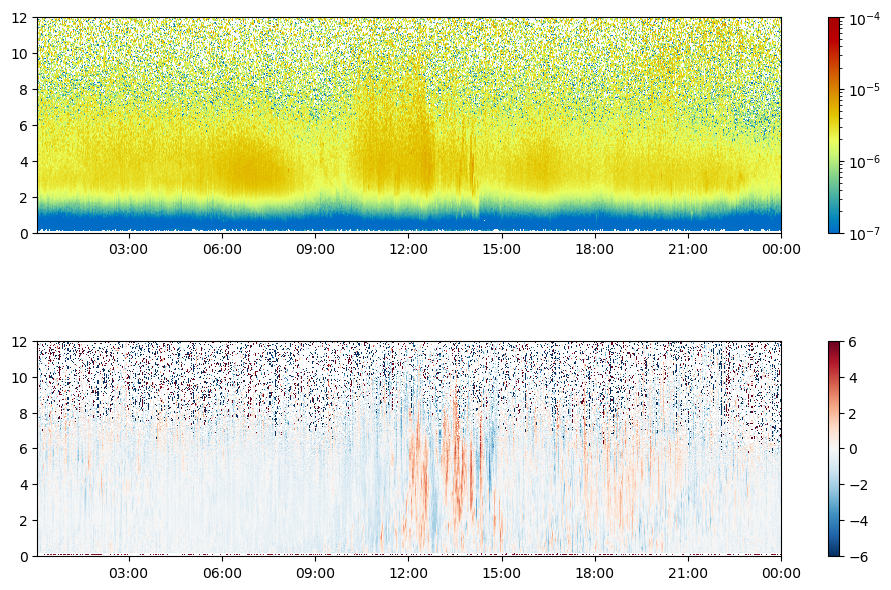

In [30]:
import matplotlib.pyplot as plt
from matplotlib import colors

import cftime
dtime = cftime.num2pydate(DS['time'][:],DS['time'].units)

fig = plt.figure(figsize=(12,7));

fig.subplots_adjust(hspace=0.5);

import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import cmocean

import datetime


ax1 = fig.add_subplot(211);
ax2 = fig.add_subplot(212);

hmax = 12;

ax1.set_ylim(0,hmax);
ax2.set_ylim(0,hmax);

title_date = dtime[0].strftime("%d-%b-%Y");

myFmt = mdates.DateFormatter('%H:%M')

ax1.xaxis.set_major_formatter(myFmt);
h1=ax1.pcolormesh(dtime[:],DS['range'][:800]/1000.,DS['beta'][:,:800].transpose(),norm=colors.LogNorm(vmin=1e-7,vmax=1e-4),cmap='pyart_HomeyerRainbow',shading='auto');
cb1=plt.colorbar(h1,ax=ax1,orientation='vertical')

ax2.xaxis.set_major_formatter(myFmt);
h2=ax2.pcolormesh(dtime[:],DS['range'][:800]/1000.,DS['v'][:,:800].transpose(),vmin=-6,vmax=6,cmap='RdBu_r',shading='auto');
cb2=plt.colorbar(h2,ax=ax2,orientation='vertical')